In [11]:
import yfinance as yf
from datetime import datetime

end = datetime.now()
start = datetime(end.year - 20, end.month, end.day)
stock = "GOOG"

google_data = yf.download(stock, start, end)

# Flatten the MultiIndex columns to a single-level index
google_data.columns = google_data.columns.to_flat_index()

# Display the updated column names
google_data.columns
google_data.columns = [col[0] for col in google_data.columns]
google_data.columns
google_data.head()

[*********************100%***********************]  1 of 1 completed


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2004-12-13,4.230138,4.245337,4.313333,4.220431,4.288177,193466452
2004-12-14,4.434634,4.450568,4.453806,4.224167,4.259036,445198482
2004-12-15,4.461685,4.477716,4.500381,4.400008,4.433134,460559845
2004-12-16,4.379539,4.395275,4.495400,4.382324,4.407231,344197318
2004-12-17,4.469130,4.485188,4.495649,4.397268,4.402498,296555412


In [8]:
google_data.shape


(5034, 6)

In [9]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5034 entries, 2004-12-13 to 2024-12-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  5034 non-null   float64
 1   Close      5034 non-null   float64
 2   High       5034 non-null   float64
 3   Low        5034 non-null   float64
 4   Open       5034 non-null   float64
 5   Volume     5034 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.3 KB


In [10]:
google_data.isna().sum()

,0
Adj Close,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing Price of Google Data')

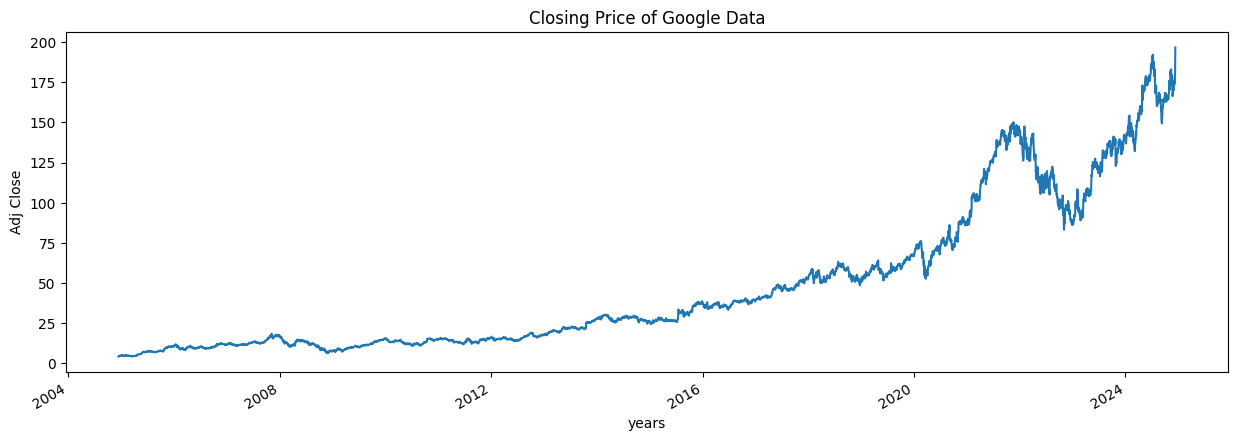

In [13]:
plt.figure(figsize=(15,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing Price of Google Data")

In [14]:
def plot_graph(figsize,values,column_name):
    plt.figure()
    values.plot()
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")

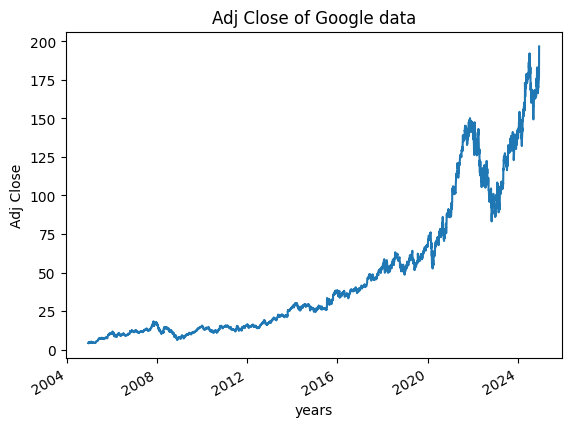

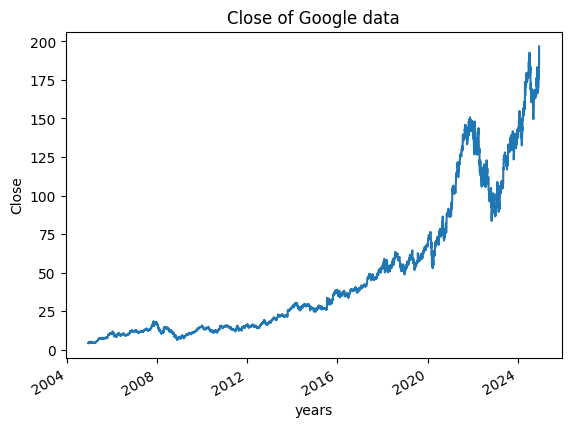

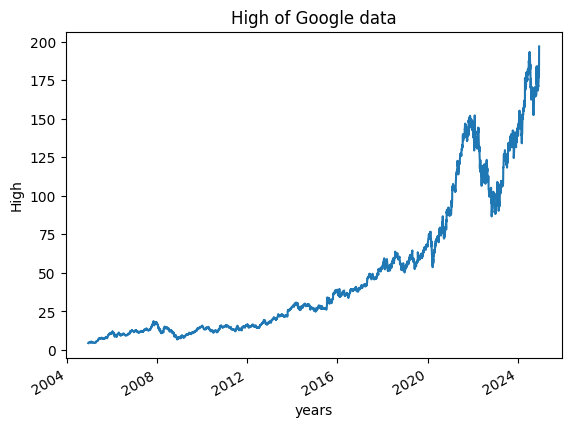

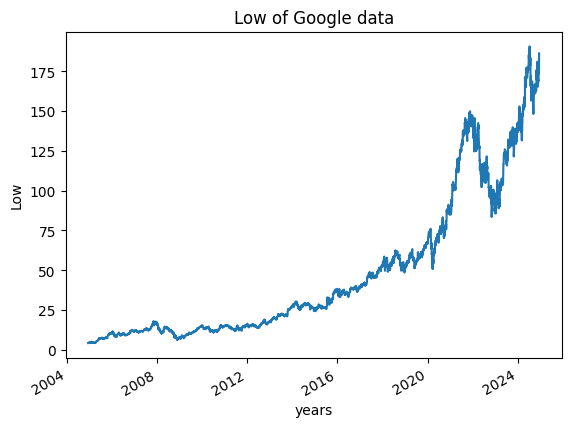

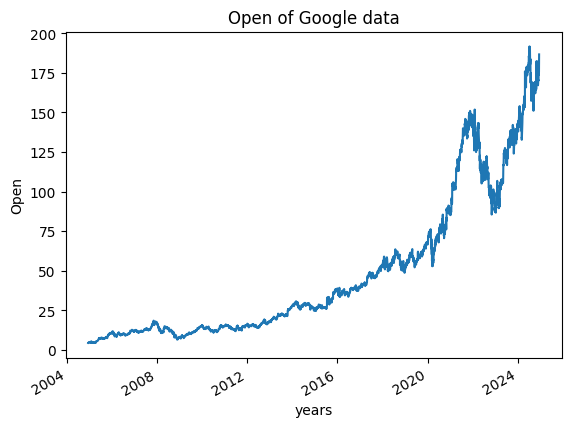

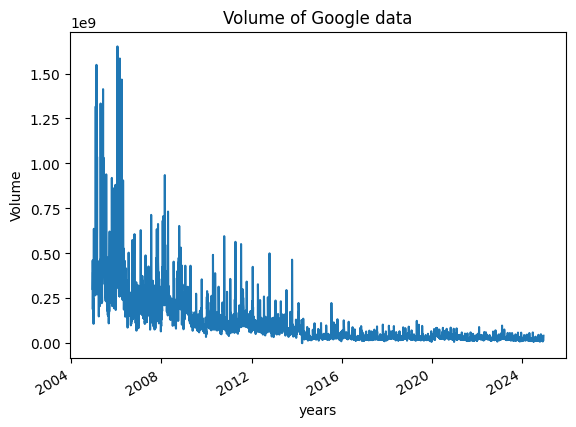

In [15]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column],column)

In [16]:
import pandas as pd
data = pd.DataFrame([10,20,30,40,50,60,70,80,90,100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [18]:
data.rolling(5).mean() #moving average detection

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0
9,80.0


In [19]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()
google_data['MA_for_250_days'][0:250].tail()

,MA_for_250_days
Date,
2005-12-01,NaN
2005-12-02,NaN
2005-12-05,NaN
2005-12-06,NaN
2005-12-07,6.535939


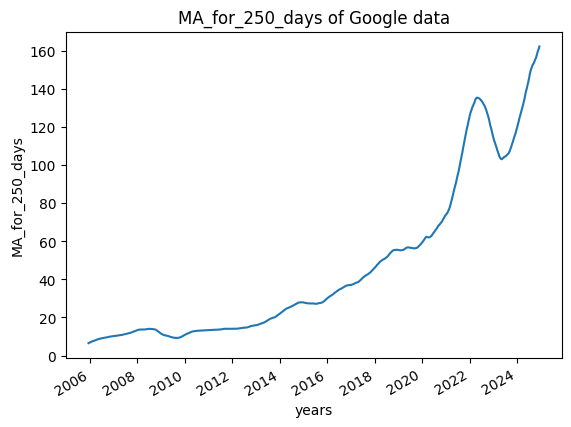

In [21]:
plot_graph((15,5),google_data['MA_for_250_days'],'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

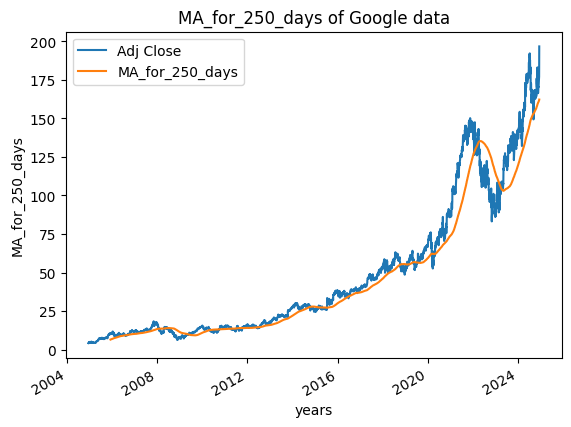

In [22]:
plot_graph((15,5),google_data[['Adj Close','MA_for_250_days']],'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

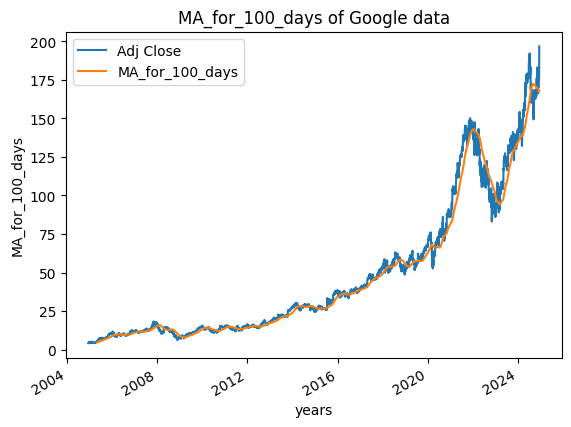

In [23]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5),google_data[['Adj Close','MA_for_100_days']],'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

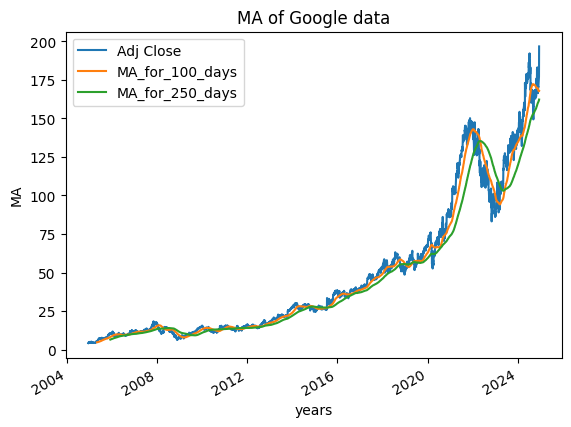

In [25]:
plot_graph((15,5),google_data[['Adj Close','MA_for_100_days','MA_for_250_days']],'MA')

In [26]:
google_data['percentage_change'] = google_data['Adj Close'].pct_change()
google_data['percentage_change'].head()

,percentage_change
Date,
2004-12-13,NaN
2004-12-14,0.048343
2004-12-15,0.006100
2004-12-16,-0.018411
2004-12-17,0.020457


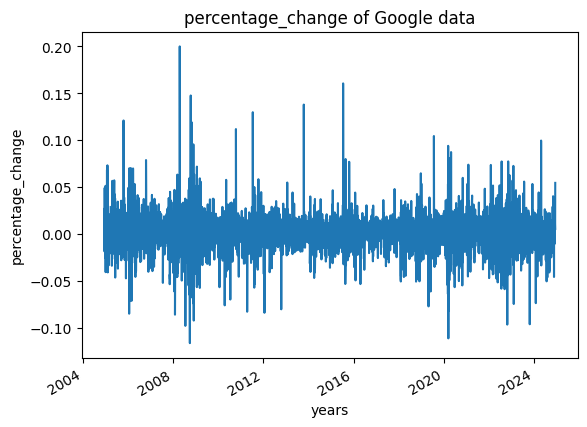

In [27]:
plot_graph((15,5),google_data['percentage_change'],'percentage_change')

In [28]:
Adj_close_price = google_data['Adj Close']


In [29]:
max(Adj_close_price.values),min(Adj_close_price.values)

(196.7100067138672, 4.230137825012207)

In [31]:
#convert to 0 to 1 range
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price.values.reshape(-1, 1))
scaled_data

array([[0.        ],
       [0.00106243],
       [0.00120297],
       ...,
       [0.89811921],
       [0.94711131],
       [1.        ]])

In [32]:
len(scaled_data)

5034

In [34]:
x_data=[]
y_data=[]
for i in range(100,len(scaled_data)):
    x_data.append(scaled_data[i-100:i,0])
    y_data.append(scaled_data[i,0])

In [35]:
import numpy as np
x_data = np.array(x_data)
y_data = np.array(y_data)

In [36]:
x_data[0],y_data[0]

(array([0.        , 0.00106243, 0.00120297, 0.00077619, 0.00124165,
        0.00187859, 0.00171484, 0.00204363, 0.00224992, 0.00276696,
        0.00287655, 0.0028946 , 0.0035006 , 0.00288042, 0.00415946,
        0.0031009 , 0.00297325, 0.00233373, 0.00301709, 0.0031731 ,
        0.00297712, 0.00321436, 0.00320791, 0.00380618, 0.00431289,
        0.00346192, 0.00302611, 0.00229892, 0.00132417, 0.00086   ,
        0.0024227 , 0.00227314, 0.00256453, 0.00324531, 0.00276567,
        0.0045785 , 0.00521028, 0.0043722 , 0.00329817, 0.00363469,
        0.00272441, 0.00226024, 0.00218546, 0.00290621, 0.00319502,
        0.00360504, 0.00353928, 0.00354573, 0.00269733, 0.00302999,
        0.00237757, 0.00198819, 0.00226153, 0.00201268, 0.00189922,
        0.00213517, 0.00199205, 0.00236725, 0.0019018 , 0.0014054 ,
        0.00122876, 0.00094768, 0.00058537, 0.00105212, 0.00066402,
        0.00113979, 0.00123649, 0.0013448 , 0.00105083, 0.00109982,
        0.00113463, 0.00141442, 0.00117589, 0.00

In [38]:
int(len(x_data)*0.7) #splitting data train 70 %

3453

In [39]:
5034-100-int(len(x_data)*0.7)

1481

In [40]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]


x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [41]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3453, 100)
(3453,)
(1481, 100)
(1481,)


In [42]:
#keras model

In [46]:
!pip install keras

In [47]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [48]:
model = Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1))) #since sequence
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [50]:
model.compile(optimizer='adam', loss='mean_squared_error') #optimize the model

In [52]:
model.fit(x_train,y_train,batch_size=1,epochs=2) #epochs means kind of iteration

Epoch 1/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 275s 80ms/step - loss: 3.8595e-05
Epoch 2/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 323s 80ms/step - loss: 3.7972e-05


In [53]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [54]:
 predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step


In [55]:
predictions


array([[0.25404492],
       [0.25826424],
       [0.2536152 ],
       ...,
       [0.8570285 ],
       [0.8604092 ],
       [0.9047781 ]], dtype=float32)

In [56]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 53.12867 ],
       [ 53.940804],
       [ 53.04596 ],
       ...,
       [169.19087 ],
       [169.8416  ],
       [178.38171 ]], dtype=float32)

In [58]:
inv_y_test = scaler.inverse_transform(y_test.reshape(-1,1))
inv_y_test

array([[ 54.35420227],
       [ 53.31244278],
       [ 52.84113312],
       ...,
       [177.1000061 ],
       [186.52999878],
       [196.71000671]])

In [63]:
rmse = np.sqrt(np.mean((inv_predictions - inv_y_test)**2))

In [64]:
rmse # root mean squared error

3.6737169045970774

In [66]:
ploting_data = pd.DataFrame(
    {
        'Original_test_data': inv_y_test.flatten(),
        'Predictions': inv_predictions.flatten()
    },
    index=google_data.index[splitting_len+100:]
)
ploting_data.head()

,Original_test_data,Predictions
Date,,
2019-01-25,54.354202,53.128670
2019-01-28,53.312443,53.940804
2019-01-29,52.841133,53.045959
2019-01-30,54.258041,52.560295
2019-01-31,55.618660,53.855736


<Figure size 640x480 with 0 Axes>

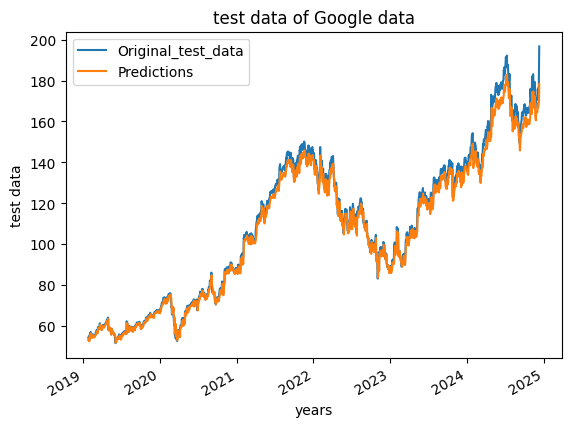

In [68]:
plot_graph((15,6),ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

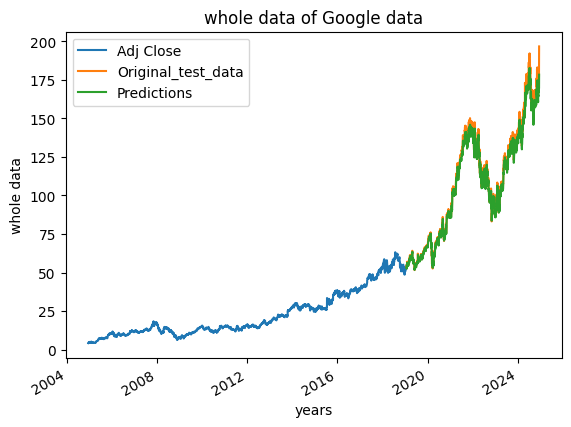

In [71]:
plot_graph((15,6),pd.concat([Adj_close_price[:splitting_len+100],ploting_data],axis=0),'whole data')

In [72]:
model.save("Latest_stock_price_model.keras")